# Chapter 2: Before we begin: the mathematical building blocks of neural networks

- Hello World!
    - Basic NN keras program blocks
- Data representation for DL:
    - Tensors: Rank vs. Dimension        
    - Tensors ranks: Scalar (0D), Vector (1D), Matrix (2D), TimeSeries (3D), Image (4D), Video (5D)
    - Data notations: Batches, Vector, Image, Time, Video
- Basic tensor operations
    - Digression: Tensor operations, Broadcasting, Reshape vs. Transpose
- Gradient-based optimization
    - Training loop
    - Stochastic Gradient Descent (SGD)
    - Backpropagation
- NN Anatomy:
    - Data
    - Model
    - Loss
    - Optimizer
    

## A first look at a neural network

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

### Data

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
len(train_labels)

60000

In [52]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
test_images.shape

(10000, 28, 28)

In [54]:
len(test_labels)

10000

In [55]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

### Model

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

### Compilation: loss + optimizer

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Learning

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [60]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2568 - acc: 0.9253
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1040 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0679 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0500 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0376 - acc: 0.9887


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [61]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 56us/step


In [62]:
print('test_acc:', test_acc)

test_acc: 0.9772



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

# 2.2 Data representations for neural networks
In the previous example, we started from data stored in multidimensional Numpy
arrays, also called tensors. In general, all current machine-learning systems use tensors
as their basic data structure.
## What is a tensor?
At its core, a tensor is a container for data—almost always numerical data. So, it’s a
container for numbers. You may be already familiar with matrices, which are 2D tensors:
tensors are a generalization of matrices to an arbitrary number of dimensions
(note that in the context of tensors, a dimension is often called an axis).

## Tensor dimension vs. rank
Dimension = number of entries in an axis
Rank = number of dimensions/axes



## Key attributes of tensors:
- Rank (.ndim)
- Shape (.shape)
- Data type (.dtype)

## Scalar (0D tensor)

In [63]:
import numpy as np
x = np.array(12)
print(x.ndim)
print(x.shape)
print(x.dtype)

0
()
int64



## Vector (1D tensor)


In [64]:
x = np.array([12, 3, 6, 14])
print(x.ndim)
print(x.shape)
print(x.dtype)

1
(4,)
int64


## Matrix (2D tensor)


In [65]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
print(x.ndim)
print(x.shape)
print(x.dtype)

2
(3, 5)
int64


### 3D tensors and higher-dimensional tensors

In [66]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])

print(x)
print(x.ndim)
print(x.shape)
print(x.dtype)

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
3
(3, 3, 5)
int64


### Back to MNIST

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [68]:
print(train_images.ndim)

3


In [69]:
print(train_images.shape)

(60000, 28, 28)


In [70]:
print(train_images.dtype)

uint8


So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of
60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients
between 0 and 255.

Let’s display the fourth digit in this 3D tensor, using the library Matplotlib


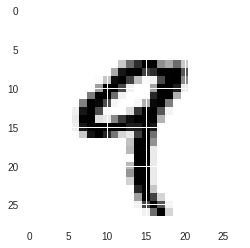

In [71]:
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Tensors slicing
The following example selects digits #10 to #100 (#100 isn’t included) and puts
them in an array of shape (90, 28, 28):

In [72]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


It’s equivalent to this more detailed notation, which specifies a start index and stop
index for the slice along each tensor axis. Note that : is equivalent to selecting the
entire axis:

In [73]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In general, you may select between any two indices along each tensor axis. For
instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you
do this:

In [0]:
my_slice = train_images[:, 14:, 14:]

It’s also possible to use negative indices. Much like negative indices in Python lists,
they indicate a position relative to the end of the current axis. In order to crop the
images to patches of 14 × 14 pixels centered in the middle, you do this:

In [0]:
my_slice = train_images[:, 7:-7, 7:-7]

## Batches and tensor notations in Keras/TensorFlow

### Dimension 0 = samples axis
In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll
come across in deep learning will be the samples axis (sometimes called the samples
dimension). In the MNIST example, samples are images of digits.

### Batches 
In addition, deep-learning models don’t process an entire dataset at once; rather,
they break the data into small batches. 

When considering such a batch tensor, the first axis (axis 0) is called the batch axis or
batch dimension. This is a term you’ll frequently encounter when using Keras and other
deep-learning libraries.

Concretely, here’s one batch of our MNIST digits,
with batch size of 128:

In [0]:
batch = train_images[:128]

And here’s the next batch:

In [0]:
batch = train_images[128:256]

And the nth batch:

In [78]:
batch = train_images[128 * n:128 * (n + 1)]


NameError: ignored

## Real-world examples of data tensors

### Vector Data

2D tensors of shape (samples, features)
samples could be the batch (size=batch_size)


Previously we called this Matrix (2D), which is still true.
But remember, we talk here about each entry of data, where each row is a vector.
We have array of Vector data, so it's a Matrix, each row is Vector data.

This is the most common case. In such a dataset, each single data point can be encoded
as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of
vectors), where the first axis is the samples axis and the second axis is the features axis.
Let’s take a look at two examples:

-  A dataset of people, where we consider each person’s age, ZIP code,
and income. Each person can be characterized as a vector of 3 values, and thus
an entire dataset of 100,000 people can be stored in a 2D tensor of shape
(100000, 3).
-  A dataset of text documents, where we represent each document by the counts
of how many times each word appears in it (out of a dictionary of 20,000 common
words). Each document can be encoded as a vector of 20,000 values (one
count per word in the dictionary), and thus an entire dataset of 500 documents
can be stored in a tensor of shape (500, 20000).

### Timeseries data or sequence data
3D tensors of shape (samples, timesteps,
features)
samples could be the batch (size=batch_size)

Whenever time matters in your data (or the notion of sequence order), it makes sense
to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a
sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D
tensor

![02_3D tensors.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/02_3D%20tensors.png?raw=true)

# The time axis is always the second axis (axis of index 1), by convention.

Let’s look at a
few examples:
-  A dataset of stock prices. Every minute, we store the current price of the stock,
the highest price in the past minute, and the lowest price in the past minute.
Thus every minute is encoded as a 3D vector, an entire day of trading is
encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading
day), and 250 days’ worth of data can be stored in a 3D tensor of shape (250,
390, 3). Here, each sample would be one day’s worth of data.
- A dataset of tweets, where we encode each tweet as a sequence of 280 characters
out of an alphabet of 128 unique characters. In this setting, each character can
be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry
at the index corresponding to the character). Then each tweet can be encoded
as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be
stored in a tensor of shape (1000000, 280, 128).

### Image data
4D tensors of shape (samples, height, width, channels) or (samples,
channels, height, width)
samples could be the batch (size=batch_size)

Images typically have three dimensions: height, width, and color depth. Although
grayscale images (like our MNIST digits) have only a single color channel and could
thus be stored in 2D tensors, by convention image tensors are always 3D, with a onedimensional
color channel for grayscale images. A batch of 128 grayscale images of
size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a
batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3)

![02_4D tensors.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/02_4D%20tensors.png?raw=true)

There are two conventions for shapes of images tensors: the channels-last convention
(used by TensorFlow) and the channels-first convention (used by Theano). The Tensor-
Flow machine-learning framework, from Google, places the color-depth axis at the
end: (samples, height, width, color_depth). Meanwhile, Theano places the color
depth axis right after the batch axis: (samples, color_depth, height, width). With the Theano convention, the previous examples would become (128, 1, 256, 256)
and (128, 3, 256, 256). The Keras framework provides support for both formats.

### Video data
5D tensors of shape (samples, frames, height, width, channels) or
(samples, frames, channels, height, width)
samples could be the batch (size=batch_size)

Video data is one of the few types of real-world data for which you’ll need 5D tensors.
A video can be understood as a sequence of frames, each frame being a color image.
Because each frame can be stored in a 3D tensor (height, width, color_depth), a
sequence of frames can be stored in a 4D tensor (frames, height, width, color_
depth), and thus a batch of different videos can be stored in a 5D tensor of shape
(samples, frames, height, width, color_depth).

For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per
second would have 240 frames. A batch of four such video clips would be stored in a
tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values! If the
dtype of the tensor was float32, then each value would be stored in 32 bits, so the
tensor would represent 405 MB. Heavy! Videos you encounter in real life are much
lighter, because they aren’t stored in float32, and they’re typically compressed by a
large factor (such as in the MPEG format).

## Tensors operations
Neural networks perform transformations to input data.
all transformations learned
by deep neural networks can be reduced to a handful of tensor operations applied to
tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors,
and so on.

### A transformation is a Layer:
In our initial example, we were building our network by stacking Dense layers on
top of each other. A Keras layer instance looks like this:

In [0]:
from keras.layers import Dense
fully_connected_layer = Dense(512, activation='relu')


This layer can be interpreted as a function, which takes as input a 2D tensor and
returns another 2D tensor—a new representation for the input tensor. Specifically, the
function is as follows (where W is a 2D tensor and b is a vector, both attributes of the
layer):

```
output = relu(dot(W, input) + b)
```

Let’s unpack this. We have three tensor operations here: a dot product (dot) between
the input tensor and a tensor named W; an addition (+) between the resulting 2D tensor
and a vector b; and, finally, a relu operation. relu(x) is max(x, 0).

### Element-wise operations
The relu operation and addition are element-wise operations: operations that are
applied independently to each entry in the tensors being considered.

In [0]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [0]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

### But in reality it's actually parallel:
This means
these operations are highly amenable to massively parallel implementations (vectorized
implementations, a term that comes from the vector processor supercomputer architecture
from the 1970–1990 period).

## Try it yourself: measure the time for very long tensors (naive vs. GPU)


### BLAS
In practice, when dealing with Numpy arrays, these operations are available as welloptimized
built-in Numpy functions, which themselves delegate the heavy lifting to a
Basic Linear Algebra Subprograms (BLAS) implementation if you have one installed
(which you should). BLAS are low-level, highly parallel, efficient tensor-manipulation
routines that are typically implemented in Fortran or C.

# Tensor Dot
Not same as element-wise
Product is a scalar, for 2 vectors


In [0]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

For matrix and vector, dot produces a vector, with same number of elements = number of rows of the matrix.

For matrix and matrix, is a another matrix, with same number of rows as the first, and number of cols as the 2nd.
#cols (1st) = #rows (2nd)



![02_tensors dot.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/02_tensors%20dot.png?raw=true)

# Tensor reshaping

Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor.

# Why?
Image you have as the example an input like:

In [0]:
train_images.shape

Since the input layer is not conv, it cannot accept 2D input (Remember LEGO where inputs should match outputs shapes for layers compatibility)

In [0]:
train_images = train_images.reshape((60000, 28 * 28))

# When to reshape and when to transpose?
Reshape is usually used to re-order the elements from a shape to another. However, elements per axis is not necessarily preserved.

Imagine that you have a vector data. As mentioned above, this type of data should be 2D: (samples, features).
Suppose that your input is mis-ordered as (featrues, samples).
Then you want to re-oreder the axes to match Keras convention.


Using reshape:
let n_samples = 3, n_features = 2

In [0]:
import numpy as np
sample_1 = [0., 1.]
sample_2 = [2., 3.]
sample_3 = [4., 5.]

Say the samples are ordered column wise

In [0]:
x = np.array([[0., 2., 4.], [1., 3., 5.]])
x.shape

Let's try to fix with reshape

In [0]:
x = x.reshape(3,2)


In [0]:
x.shape

#### Is the original samples restored?
No, why?

In [0]:
x

#### Because reshape works row-wise, but doesnot preserve the axes.

### Using transpose
np.transpose will re-order the axes, keeping the element in each axis the same.
So it's a special case of re-shape.
We usually use it for axes re-ordering.

it takes the new axes positions as input

In [0]:
x = np.array([[0., 2., 4.], [1., 3., 5.]])
x = np.transpose(x, [1,0])
x

As you can see, the original samples are resotred

#### Time series example
Imagine that you have a time series data. As mentioned above, this type of data should be 3D: (samples, time, features).
Suppose that your input is mis-ordered as (time, samples, features).
Then you want to re-oreder the axes to match Keras convention.
Here you use transpose as follows:

In [0]:
n_samples = 10
n_timesteps = 5
n_features = 3
x = np.zeros([n_samples, n_features, n_timesteps])
print(x.shape)

In [0]:
x = np.transpose(x, [0,2,1]) # also works x = x.transpose([0,2,1])
x.shape

### Notes:
1. In 2D, np.transpose holds the same mathmatical meaning as matrix transpose, so no need to feed the axes order as they will normally be flipped
2. Using reshape with the above 3D example will give the same shape, and most dangerously, the whole program will not give an error 
## But it will give wrong output and it's very hard to debug

In [79]:
x = np.zeros([n_samples, n_features, n_timesteps])
print(x.shape)
x = x.reshape([n_samples, n_timesteps, n_features])
x.shape

(10, 3, 5)


(10, 5, 3)

# Gradient based optimization
What we want to have at the end from a NN is a `Model`, represents an input-output relation
![02_gd.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/02_gd.png?raw=true)

output = relu(dot(W, input) + b)

The model has `parameters` in the above case those are `W` and `b`.
They’re called the weights or trainable parameters of the layer (the kernel and bias attributes, respectively).
These weights contain the information learned by the network from exposure to training data.

Initially, these weight matrices are filled with small random values (a step called random
initialization). Of course, there’s no reason to expect that relu(dot(W, input) + b),
when W and b are random, will yield any useful representations. The resulting representations
are meaningless—but they’re a starting point. 
### Learning:
What comes next is to gradually
adjust these weights, based on a feedback signal. This gradual adjustment, also called
training, is basically the learning that machine learning is all about.

## Training loop

This happens within what’s called a training loop, which works as follows. Repeat
these steps in a loop, as long as necessary:

1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this batch.

You’ll eventually end up with a network that has a very low loss on its training data: a
low mismatch between predictions y_pred and expected targets y. The network has
“learned” to map its inputs to correct targets. From afar, it may look like magic, but
when you reduce it to elementary steps, it turns out to be simple.

Step 1 sounds easy enough—just I/O code. Steps 2 and 3 are merely the application
of a handful of tensor operations, so you could implement these steps purely
from what you learned in the previous section. The difficult part is step 4: updating
the network’s weights. 
### Given an individual weight coefficient in the network, how can you compute whether the coefficient should be increased or decreased, and by how much?
One naive solution would be to freeze all weights in the network except the one
scalar coefficient being considered, and try different values for this coefficient. Let’s
say the initial value of the coefficient is 0.3. After the forward pass on a batch of data,
the loss of the network on the batch is 0.5. If you change the coefficient’s value to 0.35
and rerun the forward pass, the loss increases to 0.6. But if you lower the coefficient to
0.25, the loss falls to 0.4. In this case, it seems that updating the coefficient by -0.05 would contribute to minimizing the loss. This would have to be repeated for all coefficients
in the network. But such an approach would be horribly inefficient, because you’d need to compute
two forward passes (which are expensive) for every individual coefficient (of
which there are many, usually thousands and sometimes up to millions).


## Follow the opposite gradient down: Gradient Descent
 A much better
approach is to take advantage of the fact that all operations used in the network
are differentiable, and compute the gradient of the loss with regard to the network’s
coefficients. You can then move the coefficients in the opposite direction from the
gradient, thus decreasing the loss.
![image.png](attachment:image.png)

```
y_pred = dot(W, x)
loss_value = loss(y_pred, y) # loss_value = f(W)
# Let’s say the current value of W is W0.
# Update weights opposite to the gradient of the loss at the W=W0
W1 = W0 - step * gradient(f)(W0)# gradient(f) w.r.t. W is easily calculated in DL frameworks thanks to sybmolic auto diff.
# Repeat for W2, W3,....W100
```

## Stochastic Gradient Descent
### GD (batch SGD)
The above GD algorithm updates the gradient with every new sample of x.
If X is of 1000 samples, then the delta_W[t+1] = step * gradient(f)(W[t]) is calculated and accumulated every sample, but the application of weight update is done once after all 1000 samples are fed.

- Update once at the end
- High accumulation of error, Risk of saturation
- Slow feedback, slow convergence, but more stable
- Take advantage of parallelism in matrix operations (comp. arch.)

### SGD
There are other options of updating:
1. SGD: Each sample (batch_size=1)

    - Fast feedback, fast convergence (corrects itself a lot) 
    - Could oscillate, unstable (tend to corrupt what it learnt)
    - Not taking advantage of parallelism in matrix operations (comp. arch.)
    - Not saturating
    - Stochastic: every update is a representing sample of the true gradient 
2. Minibatch SGD: Every group of samples (batch_size=N)
Accumulate M gradients, update every M
    - More stable than 1 sample
    - Faster than GD
### Steps
    1. Draw a batch of training samples x and corresponding targets y.
    2. Run the network on x to obtain predictions y_pred.
    3. Compute the loss of the network on the batch, a measure of the mismatch
    between y_pred and y.
    4. Compute the gradient of the loss with regard to the network’s parameters (a
    backward pass).
    5. Move the parameters a little in the opposite direction from the gradient—for
    example W -= step * gradient—thus reducing the loss on the batch a bit.

### Learning rate
As you can see, intuitively it’s important to pick a reasonable value for the step factor.
If it’s too small, the descent down the curve will take many iterations, and it could get
stuck in a local minimum. If step is too large, your updates may end up taking you to
completely random locations on the curve.

### Momentum
Additionally, there exist multiple variants of SGD that differ by taking into account
previous weight updates when computing the next weight update, rather than just
looking at the current value of the gradients. There is, for instance, SGD with momentum,
as well as Adagrad, RMSProp, and several others. Such variants are known as optimization
methods or optimizers. In particular, the concept of momentum, which is used in
many of these variants, deserves your attention. Momentum addresses two issues with
SGD: convergence speed and local minima.
    
Momentum draws inspiration from physics.
A useful mental image here is to think of the optimization process as a small ball
rolling down the loss curve. If it has enough momentum, the ball won’t get stuck in a
ravine and will end up at the global minimum. Momentum is implemented by moving
the ball at each step based not only on the current slope value (current acceleration)
but also on the current velocity (resulting from past acceleration). In practice, this
means updating the parameter w based not only on the current gradient value but also
on the previous parameter update, such as in this naive implementation:

```
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum + learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```    

### Momentum to avoid local min


![02_momentum.png](https://github.com/ahmadelsallab/practical_dl/blob/master/Keras/notebooks/imgs/02_momentum.png?raw=true)

You can avoid such issues by using momentum, 

## Backprop
In the previous algorithm, we casually assumed that because a function is differentiable,
we can explicitly compute its derivative. In practice, a neural network function
consists of many tensor operations chained together, each of which has a simple,
known derivative. For instance, this is a network f composed of three tensor operations,
a, b, and c, with weight matrices W1, W2, and W3:

`f(W1, W2, W3) = a(W1, b(W2, c(W3)))`
Calculus tells us that such a chain of functions can be derived using the following identity,
called the chain rule: `f(g(x)) = f'(g(x)) * g'(x)`. Applying the chain rule to the
computation of the gradient values of a neural network gives rise to an algorithm called Backpropagation (also sometimes called reverse-mode differentiation). 

Backpropagation starts with the final loss value and works backward from the top layers to the bottom
layers, applying the chain rule to compute the contribution that each parameter
had in the loss value.
![image.png](attachment:image.png)

### Symbolic differentiation
Nowadays, and for years to come, people will implement networks in modern
frameworks that are capable of symbolic differentiation, such as TensorFlow. This means
that, given a chain of operations with a known derivative, they can compute a gradient
function for the chain (by applying the chain rule) that maps network parameter values
to gradient values. When you have access to such a function, the backward pass is
reduced to a call to this gradient function. Thanks to symbolic differentiation, you’ll
never have to implement the Backpropagation algorithm by hand. For this reason, we
won’t waste your time and your focus on deriving the exact formulation of the Backpropagation
algorithm in these pages. All you need is a good understanding of how
gradient-based optimization works.

# NN Anatomy (Revision of 1st example)
## 1. Data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 2. Model

In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [83]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Loss
## 4. Optimizer
Both under one step in Keras called compile

In [0]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [85]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

ValueError: ignored

# Why the above error?
Let's have a look on the labels

In [86]:
train_labels.shape

(60000,)

In [87]:
train_labels[0]

5

Our final activation is 'softmax', and our loss is 'categorial'.

This means that, our output must be consistent with softmax output.

That format is called __One-Hot Encoding__

In [90]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
print(train_labels.shape)
print(train_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [91]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.2546 - acc: 0.9268
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.1027 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0678 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0497 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0379 - acc: 0.9887
